# New Movie Studio Analysis for Microsoft

## Overview

This project analyze the type of films the new studio of Microsoft should create. Insights from the project.....

## Business Promlem

- We have to analyze the what types of movies are doing the best in the box office right now. 
- Amazon acquiring MGM. Why? - Amazon said it bought the company because of its library, and plans to remake its titles at TV shows and movies. - IP like Jame Bonds series
- General factors which drives the movies box office success - 
    - star power (popularity of the cast), 
    - acting expertise, 
    - rousing reviews, 
    - public ratings(Imdb, rotten tomatoes), 
    - the genre, 
    - time of release - any seasonality ,
    - marketing of the movie
    - franchise - Marvel/DC/Jame Bond series etc
    
- What could be the top three deciding factors to choose the type of movies to make for Microsoft?
    1. xyz
    

### Exploring Data
- Box Office Mojo 
- IMDB - SQL database 
- Rotten Tomatoes
- TheMovieDB
- The Numbers

In [2]:
#Imports

import pandas as pd
import sqlite3
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
conn = sqlite3.connect('./zippedData/im.db')

In [4]:
box_office_mojo_df=pd.read_csv('zippedData/bom.movie_gross.csv.gz')
box_office_mojo_df['studio'].value_counts()

IFC       166
Uni.      147
WB        140
Fox       136
Magn.     136
         ... 
Indic.      1
CLF         1
B360        1
WOW         1
HC          1
Name: studio, Length: 257, dtype: int64

In [5]:
box_office_mojo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [6]:
rt_movie_info_df=pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t')
rt_movie_info_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [7]:
rt_reviews_df=pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t', encoding = 'unicode_escape')
rt_reviews_df['fresh'].value_counts()

fresh     33035
rotten    21397
Name: fresh, dtype: int64

In [8]:
rt_reviews_df.loc[rt_reviews_df['fresh'] == 'rotten']

,id,review,rating,fresh,critic,top_critic,publisher,date
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
12,3,Robert Pattinson works mighty hard to make Cos...,2/4,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013"
18,3,It's fascinating to watch Pattinson actually a...,2/4,rotten,Sean P. Means,0,Salt Lake Tribune,"September 14, 2012"
...,...,...,...,...,...,...,...,...
54424,2000,Dawdles and drags when it should pop; it doesn...,1.5/5,rotten,Manohla Dargis,1,Los Angeles Times,"September 26, 2002"
54426,2000,The film lapses too often into sugary sentimen...,NaN,rotten,Paul Malcolm,1,L.A. Weekly,"September 26, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"


In [9]:
MoviesDB_df=pd.read_csv('zippedData/tmdb.movies.csv.gz')
MoviesDB_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [10]:
movie_budget=pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [11]:
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


### Accessing the SQL data into a df
#### IMDB Database

* `movie_basics` : Table containing movies including original movie title, premiered movie title(primary title?), release year, length of the movie and the genre
* `persons` : Table containing the name of people in the theatre entertainment industry and their primary profession (actor, director etc.)
* `directors`: Table with movie ID and its correspongin director's ID
* `known_for`: Table containing the person's ID and the corresponding movie ID that the person is known for.
* `movie_akas`: Table containing movies and the title they are known as in different countries.
* `movie_ratings`: Table containing movie ID and their average rating and number of ratings they received on IMDB
* `principals`: Table containing movie ID and the corresponding person ID that is involved in the movie in some sort of capacity, specified in the category, jobs and character (if they are actors) columns.
* `writers` : Table containing movie ID and their corresponding writers' person ID

In [12]:
def read_sql_as_df(table_name, con):
    """
    Selects all columns in a database table and convert it into a Dataframe
    -
    Input:
    table_name = takes in a string of the table name to import
    con = variable that has the established database connection   
    -
    Output:
    DataFrame containing all columns of the database table.
    """
    query = """SELECT * FROM ({table_name})""".format(table_name = table_name)
    return pd.read_sql(query,con)

In [13]:
movie_akas_df = read_sql_as_df('movie_akas',conn)
movie_akas_df.head(10)

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
5,tt0369610,15,Jurassic World,GR,None,imdbDisplay,None,0.0
6,tt0369610,16,Jurassic World,IT,None,imdbDisplay,None,0.0
7,tt0369610,17,Jurski svijet,HR,None,imdbDisplay,None,0.0
8,tt0369610,18,Olam ha'Yura,IL,he,imdbDisplay,None,0.0
9,tt0369610,19,Jurassic World: Mundo Jurásico,MX,None,imdbDisplay,None,0.0


In [14]:
movie_ratings_df = read_sql_as_df('movie_ratings',conn)
movie_ratings_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [15]:
directors_df = read_sql_as_df('directors',conn)
directors_df.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [16]:
writers_df = read_sql_as_df('writers',conn)
writers_df.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087


In [17]:
movie_basics_df = read_sql_as_df('movie_basics',conn)
movie_basics_df
# movie_basics.columns

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [18]:
persons_df = read_sql_as_df('persons',conn)
persons_df.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [19]:
known_for_df = read_sql_as_df("known_for",conn)
known_for_df.head()

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


In [20]:
principals = read_sql_as_df("principals",conn)
principals.head()

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


In [21]:
tmdb_movies_df = pd.read_csv('./zippedData/tmdb.movies.csv.gz')
tmdb_movies_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [22]:
#Join the table movie_basics and movie_ratings to start exploring popularity and average reviews by genre.


movie_basics_reviews = pd.read_sql("""
SELECT mb.movie_id, mb.primary_title ,mb.start_year,mb.runtime_minutes, mb.genres
        ,r.averagerating, r.numvotes
        
FROM movie_basics as mb
INNER JOIN movie_ratings as r
        ON mb.movie_id = r.movie_id

""",conn)
movie_basics_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   start_year       73856 non-null  int64  
 3   runtime_minutes  66236 non-null  float64
 4   genres           73052 non-null  object 
 5   averagerating    73856 non-null  float64
 6   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 3.9+ MB


In [23]:

movie_basics_reviews_cleaned = movie_basics_reviews.dropna(subset =['genres']) #drop rows with null values in the genre column
#Reset the table index after dropping the null rows
movie_basics_reviews_cleaned=movie_basics_reviews_cleaned.reset_index(drop=True)
#List of common film genres

genre_list=["Action","Comedy","Drama","Fantasy","Horror","Mystery","Romance","Thriller","Western","Sci-Fi","Animation"
            ,"Documentary","Biography","Crime","Musical","History","Family"]
#Make a new column for each genre with boolean values. True if genre is one of the movie's genre list.

for genre in genre_list:
    movie_basics_reviews_cleaned[genre]=[True if genre in movie else False for movie in movie_basics_reviews_cleaned['genres'] ]

In [24]:
#Create genre popularity dict with genre name as keys and number of movies with that genre as values. The total values of all
#keys will be more than the total movies in the data because some movies are considered as multiple genres.

genre_popularity = { genre: movie_basics_reviews_cleaned[genre].sum() for genre in genre_list}
genre_popularity = dict(sorted(genre_popularity.items(),key=lambda item: item[1]))
genre_popularity

{'Western': 280,
 'Musical': 721,
 'Animation': 1743,
 'Fantasy': 2126,
 'Sci-Fi': 2206,
 'History': 2825,
 'Mystery': 3039,
 'Family': 3412,
 'Biography': 3809,
 'Crime': 4611,
 'Romance': 6589,
 'Action': 6988,
 'Horror': 7674,
 'Thriller': 8217,
 'Comedy': 17290,
 'Documentary': 17753,
 'Drama': 30788}

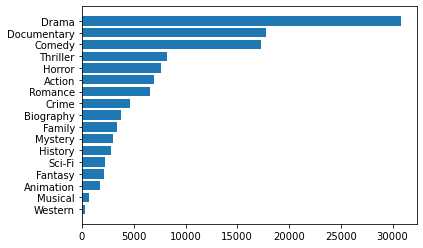

In [25]:
#Plot of Genre Popularity. 

fig, ax = plt.subplots()

ax.barh(list(genre_popularity.keys()),genre_popularity.values())


plt.show()

In [26]:
#Calculating average rating:

genre_rating ={}

for genre in genre_list: #loop through genre in the genre list defined prior
    n = 0 #number of movies 
    rating_sum = 0 #rating summation
    idx =0  #keep track of index
    for row in movie_basics_reviews_cleaned[genre]:
        if (row==True):
#             print(test['averagerating'][0])
            rating_sum += movie_basics_reviews_cleaned['averagerating'][idx]
            n+=1
        idx +=1
    genre_rating[genre] = rating_sum/n #rating summation divided by number of movies
    
genre_rating =dict(sorted(genre_rating.items(),key=lambda item: item[1]))

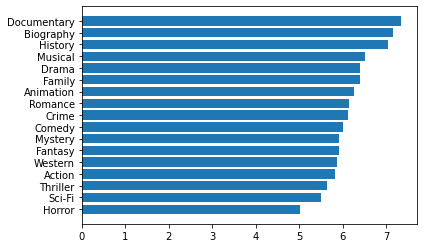

In [27]:
# Average rating by genre

fig, ax = plt.subplots()

ax.barh(list(genre_rating.keys()),genre_rating.values())


plt.show()

# Return on investment on the movies

We want to calculate the return of investment and total gross revenues of the movies and sort the data with the highest grossing movies first. 

--- Box Office Mojo data

In [28]:
# Using the Box Office Mojo data, we calculate the Total Gross revenue and put it in a new df called "BOM_financials_df"
BOM_financials_df=box_office_mojo_df

In [29]:
BOM_financials_df.isna().sum() # we see some null values, lets check if any entires with null in both domestic and foreign

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [30]:
BOM_financials_df.loc[(BOM_financials_df['domestic_gross'].isna() == True) &(BOM_financials_df['foreign_gross'].isna() == True)]

,title,studio,domestic_gross,foreign_gross,year


In [31]:
#change the foreign gross to float datatype
BOM_financials_df['foreign_gross'] = BOM_financials_df['foreign_gross'].str.replace(',','')
BOM_financials_df['foreign_gross'] = BOM_financials_df['foreign_gross'].astype(float)

In [32]:
# no rows in the data with no gross values, good thing. 
# create a new total gross column 
BOM_financials_df["total_gross (000.000)"] = (BOM_financials_df['domestic_gross'] + BOM_financials_df['foreign_gross'])/1000000
BOM_financials_df.sort_values(by='total_gross (000.000)', ascending=False)

,title,studio,domestic_gross,foreign_gross,year,total_gross (000.000)
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1518.9
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1405.4
3080,Black Panther,BV,700100000.0,646900000.0,2018,1347.0
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1341.5
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1332.6
...,...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018,NaN
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018,NaN
3384,El Pacto,Sony,2500.0,NaN,2018,NaN
3385,The Swan,Synergetic,2400.0,NaN,2018,NaN


---- The Numbers Data

In [33]:
TB_financials_df=movie_budget
TB_financials_df.isna().sum() #yay no null values!

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [34]:
TB_financials_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [35]:
# check if date type is consistent
TB_financials_df.info() #no, check into float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [36]:
#first remove $ and commas
TB_financials_df['production_budget'] = TB_financials_df['production_budget'].str.replace('$','')
TB_financials_df['production_budget'] = TB_financials_df['production_budget'].str.replace(',','')
TB_financials_df['domestic_gross'] = TB_financials_df['domestic_gross'].str.replace('$','')
TB_financials_df['domestic_gross'] = TB_financials_df['domestic_gross'].str.replace(',','')
TB_financials_df['worldwide_gross'] = TB_financials_df['worldwide_gross'].str.replace('$','')
TB_financials_df['worldwide_gross'] = TB_financials_df['worldwide_gross'].str.replace(',','')

#convert production_budget, domestic_gross, worldwide_gross to float
TB_financials_df['production_budget'] = TB_financials_df['production_budget'].astype(float)
TB_financials_df['domestic_gross'] = TB_financials_df['domestic_gross'].astype(float)
TB_financials_df['worldwide_gross'] = TB_financials_df['worldwide_gross'].astype(float)

In [37]:
TB_financials_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


In [38]:
#Calculate the ROI
TB_financials_df['ROI'] = TB_financials_df['worldwide_gross'] / TB_financials_df['production_budget']

#sort the rows by ROI
TB_financials_df = TB_financials_df.sort_values(by ='ROI', ascending=False)

In [39]:
TB_financials_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 5745 to 4982
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
 6   ROI                5782 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 361.4+ KB


In [40]:
ROI_genre=TB_financials_df.merge(movie_basics_reviews_cleaned, how='left', left_on = 'movie', right_on = 'primary_title')

In [41]:
ROI_genre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6465 entries, 0 to 6464
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 6465 non-null   int64  
 1   release_date       6465 non-null   object 
 2   movie              6465 non-null   object 
 3   production_budget  6465 non-null   float64
 4   domestic_gross     6465 non-null   float64
 5   worldwide_gross    6465 non-null   float64
 6   ROI                6465 non-null   float64
 7   movie_id           2867 non-null   object 
 8   primary_title      2867 non-null   object 
 9   start_year         2867 non-null   float64
 10  runtime_minutes    2752 non-null   float64
 11  genres             2867 non-null   object 
 12  averagerating      2867 non-null   float64
 13  numvotes           2867 non-null   float64
 14  Action             2867 non-null   object 
 15  Comedy             2867 non-null   object 
 16  Drama              2867 

In [42]:
movie_basics_reviews_cleaned.loc[movie_basics_reviews_cleaned['primary_title'] == 'Red 11']

,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,Action,Comedy,Drama,...,Thriller,Western,Sci-Fi,Animation,Documentary,Biography,Crime,Musical,History,Family
67907,tt7837402,Red 11,2019,77.0,"Horror,Sci-Fi,Thriller",5.6,43,False,False,False,...,True,False,True,False,False,False,False,False,False,False


In [43]:
# drop the null from ROI_genre df, remaining rows only 2867
ROI_genre = ROI_genre.dropna(subset = ['primary_title'])
#Reset the table index after dropping the null rows
ROI_genre=ROI_genre.reset_index(drop=True)
ROI_genre.isna().sum() #ignore run_minutes

id                     0
release_date           0
movie                  0
production_budget      0
domestic_gross         0
worldwide_gross        0
ROI                    0
movie_id               0
primary_title          0
start_year             0
runtime_minutes      115
genres                 0
averagerating          0
numvotes               0
Action                 0
Comedy                 0
Drama                  0
Fantasy                0
Horror                 0
Mystery                0
Romance                0
Thriller               0
Western                0
Sci-Fi                 0
Animation              0
Documentary            0
Biography              0
Crime                  0
Musical                0
History                0
Family                 0
dtype: int64

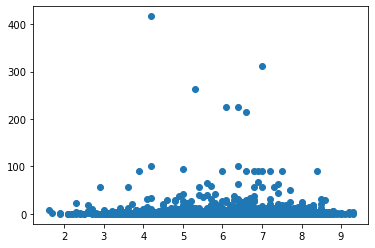

In [44]:
# Average rating by ROI

fig, ax = plt.subplots()

ax.scatter(ROI_genre['averagerating'], ROI_genre['ROI'])


plt.show()

In [45]:
#Calculating average ROI by genre:

genre_ROI= {}

for genre in genre_list: #loop through genre in the genre list defined prior
    n = 0 #number of movies 
    ROI_sum = 0 #rating summation
    idx =0  #keep track of index
    for row in ROI_genre[genre]:
        if (row==True):

            ROI_sum += ROI_genre['ROI'][idx]
            n+=1
        idx +=1
    genre_ROI[genre] = ROI_sum/n #ROI summation divided by number of movies
    
genre_ROI =dict(sorted(genre_ROI.items(),key=lambda item: item[1]))

In [46]:
genre_ROI

{'Western': 1.1930858254251253,
 'Crime': 2.313791663537742,
 'Sci-Fi': 2.9817124744660584,
 'Musical': 3.2996756735540056,
 'History': 3.325007817983898,
 'Comedy': 3.468057650246861,
 'Action': 3.4804685369326394,
 'Drama': 3.732485269880872,
 'Documentary': 4.186751085145187,
 'Family': 4.327461317461293,
 'Animation': 4.347300118192058,
 'Fantasy': 4.533822487807842,
 'Romance': 4.577531585065213,
 'Biography': 4.90656470942905,
 'Thriller': 5.553269435501253,
 'Mystery': 7.152859031095045,
 'Horror': 8.234754250140911}

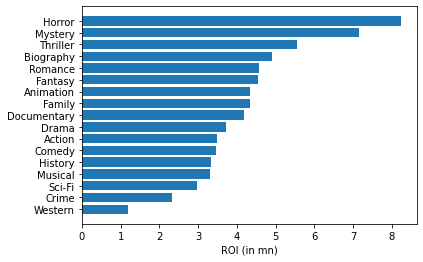

In [58]:
# Genre by ROI

fig, ax = plt.subplots()

ax.barh(list(genre_ROI.keys()), genre_ROI.values())
ax.set_xlabel('ROI (in mn)')
plt.savefig("/Users/Alice/Desktop/xyz.jpeg");

In [48]:
#correlation b/w production budget and ROI

In [49]:
ROI_genre['release_date']=pd.to_datetime(ROI_genre['release_date'])
test=ROI_genre.sort_values(by='release_date')
test_2=(pd.DatetimeIndex(test['release_date']).month).value_counts()
#type(pd.DatetimeIndex(test['release_date']).month)
test_2

12    374
10    271
9     244
4     244
3     240
11    236
8     235
6     234
7     213
2     205
5     189
1     182
Name: release_date, dtype: int64

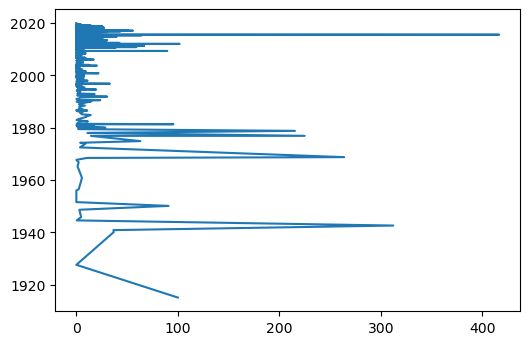

In [50]:
fig, ax = plt.subplots()
fig.set_dpi(100)

ax.plot( test['ROI'], test['release_date'])


plt.show()

# Reboot

In [51]:
movie_budget['release_date'] = pd.to_datetime(movie_budget['release_date'])
movie_budget['Year'] = movie_budget['release_date'].dt.year
movie_budget.describe()

,id,production_budget,domestic_gross,worldwide_gross,ROI,Year
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03,5782.000000,5782.000000
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07,4.800161,2003.967139
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08,29.530282,12.724386
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00,0.000000,1915.000000
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06,0.492296,2000.000000
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07,1.708310,2007.000000
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07,3.758346,2012.000000
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,1800.000000,2020.000000


In [52]:
decades_df = movie_budget[(movie_budget['Year'] >= 1980) & (movie_budget['Year'] <=2000)]
decades_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,Year
42,43,1997-12-19,Titanic,200000000.0,659363944.0,2.208208e+09,11.041042,1997
106,7,1999-06-30,Wild Wild West,175000000.0,113805681.0,2.212293e+08,1.264168,1999
109,10,1995-07-28,Waterworld,175000000.0,88246220.0,2.642462e+08,1.509978,1995
199,100,1999-06-16,Tarzan,145000000.0,171091819.0,4.481918e+08,3.090978,1999
207,8,1998-07-01,Armageddon,140000000.0,201578182.0,5.546000e+08,3.961429,1998
...,...,...,...,...,...,...,...,...
5752,53,1991-08-01,Slacker,23000.0,1227508.0,1.227508e+06,53.369913,1991
5762,63,1997-04-11,Pink Flamingos,12000.0,413802.0,4.138020e+05,34.483500,1997
5769,70,1996-04-01,Bang,10000.0,527.0,5.270000e+02,0.052700,1996
5773,74,1993-02-26,El Mariachi,7000.0,2040920.0,2.041928e+06,291.704000,1993


In [53]:
decades_df['production_budget'] = decades_df['production_budget'].str.replace('$','')
decades_df['production_budget'] = decades_df['production_budget'].str.replace(',','')
decades_df['domestic_gross'] = decades_df['domestic_gross'].str.replace('$','')
decades_df['domestic_gross'] = decades_df['domestic_gross'].str.replace(',','')
decades_df['worldwide_gross'] = decades_df['worldwide_gross'].str.replace('$','')
decades_df['worldwide_gross'] = decades_df['worldwide_gross'].str.replace(',','')

decades_df['production_budget'] = decades_df['production_budget'].astype(float)
decades_df['domestic_gross'] = decades_df['domestic_gross'].astype(float)
decades_df['worldwide_gross'] = decades_df['worldwide_gross'].astype(float)


AttributeError: Can only use .str accessor with string values!

In [ ]:
decades_df['production_budget'] = decades_df['production_budget'] / 1000000
decades_df['domestic_gross'] = decades_df['domestic_gross'] / 1000000
decades_df['worldwide_gross'] = decades_df['worldwide_gross'] / 1000000

In [ ]:
decades_top50 = decades_df.sort_values(by='worldwide_gross',ascending=False).head(50)
decades_top50

In [ ]:
franchise=["Terminator 2: Judgment Day","Star Wars Ep. V: The Empire Strikes Back","Star Wars Ep. VI: Return of the Jedi","Star Wars Ep. I: The Phantom Menace", "Jurassic", "Indiana Jones and the Last Crusade", "Raiders of the Lost Ark"]

In [ ]:
#duplicated_movies2 = movie_budget

In [ ]:
#duplicated_movies2['movie'][500]

In [ ]:
#idx=0
#for movie_entry in duplicated_movies2['movie']:
#    #print(movie_entry)
#    for idx in range(len(duplicated_movies2['movie'])):
#        if movie_entry in duplicated_movies2['movie'][idx]:
#            duplicated_movies2['Reboot'] = True
#        else:
#            duplicated_movies2['Reboot'] = False)

In [ ]:
#duplicated_movies3[duplicated_movies3['movie'] == 'Batman']

duplicated_movies2['Reboot'].value_counts()

In [ ]:
top_50= list(decades_top50['movie'])
top_50[:5]

In [ ]:
duplicated_movies3= movie_budget
duplicated_movies3['Reboot'] = False
duplicated_movies3['Reboot'].value_counts()

len(duplicated_movies3.loc[duplicated_movies3['movie'].str.contains('Jurassic', case = False, regex=True)])

In [ ]:
index=[]
for item in top_50:
    #if item in duplicated_movies3['movie']:
        #print(item)
        if len(duplicated_movies3.loc[duplicated_movies3['movie'].str.contains(item, case = False, regex=True)])>1:
            index=list(duplicated_movies3.loc[duplicated_movies3['movie'].str.contains(item, case = False, regex=True)].index)
            print(index)
            for indice in index:
                duplicated_movies3['Reboot'][indice] =True
            
            #duplicated_movies3['Reboot'][] = True
    #duplicated_movies3['Reboot'] = True

In [ ]:
duplicated_movies3.info()

In [ ]:
duplicated_movies3[duplicated_movies3['movie'].str.contains('Jurassic', case = False, regex=True)]

In [ ]:
duplicated_movies3[duplicated_movies3['movie'].str.contains('Batman', case = False, regex=True)]

duplicated_movies = movie_budget
duplicated_movies['Reboot'] = duplicated_movies['movie'].duplicated(keep = False)==True
duplicated_movies.head()

In [ ]:
decades_duplicated1=decades_top50.merge(duplicated_movies3, how = 'left', on = 'movie')
decades_duplicated1

In [ ]:
decades_duplicated_cleaned = decades_duplicated1.drop(['release_date_x', 'id_y', 'release_date_y', 'production_budget_y', 'domestic_gross_y', 'worldwide_gross_y', 'Year_y', 'ROI_y'], axis = 1)
decades_duplicated_cleaned

In [ ]:
#hard coding the franchise to classifying them as reboots
for movie in franchise:
    index=decades_duplicated_cleaned.loc[decades_duplicated_cleaned['movie'] == movie].index
    decades_duplicated_cleaned['Reboot'][index] = True

In [ ]:
movie_budget[movie_budget['movie'] == 'Titanic']

In [ ]:
decades_duplicated_cleaned

# see how much are the reboots making now! 

In [ ]:
#decades_duplicated_cleaned - contains top 50 movies of 80s and 90s and a column is reboot true or false

In [ ]:
decades_rebooted=decades_duplicated_cleaned[decades_duplicated_cleaned['Reboot'] == True]
list_decades_rebooted = list(decades_rebooted['movie'])
list_decades_rebooted

In [ ]:
#hardcoding the franchise names in movies list to be able to group by for franchise as well
list_decades_rebooted[1] ='Jurassic'
list_decades_rebooted[2] ='Star Wars'
list_decades_rebooted[10] ='Mission: Impossible'
list_decades_rebooted[13] = 'Terminator'
list_decades_rebooted[14]='Toy Story'
list_decades_rebooted

In [ ]:
non_decade_df=movie_budget[(movie_budget['Year'] >2000)]
non_decade_df

In [ ]:
non_decade_df['production_budget'] = non_decade_df['production_budget'].str.replace('$','')
non_decade_df['production_budget'] = non_decade_df['production_budget'].str.replace(',','')
non_decade_df['domestic_gross'] = non_decade_df['domestic_gross'].str.replace('$','')
non_decade_df['domestic_gross'] = non_decade_df['domestic_gross'].str.replace(',','')
non_decade_df['worldwide_gross'] = non_decade_df['worldwide_gross'].str.replace('$','')
non_decade_df['worldwide_gross'] = non_decade_df['worldwide_gross'].str.replace(',','')

non_decade_df['production_budget'] = non_decade_df['production_budget'].astype(float)
non_decade_df['domestic_gross'] = non_decade_df['domestic_gross'].astype(float)
non_decade_df['worldwide_gross'] = non_decade_df['worldwide_gross'].astype(float)

non_decade_df['production_budget'] = non_decade_df['production_budget'] / 1000000
non_decade_df['domestic_gross'] = non_decade_df['domestic_gross'] / 1000000
non_decade_df['worldwide_gross'] = non_decade_df['worldwide_gross'] / 1000000

In [ ]:

#for item in list_decades_rebooted:
#    if item in non_decade_df['movie']:
        
    

In [ ]:
non_decade_df.head()

In [ ]:
duplicated_movies3['worldwide_gross'][3822] = 5127434
duplicated_movies3['worldwide_gross'][4628] = 1081041287
duplicated_movies3['worldwide_gross'][5031] = 1800000

In [ ]:
duplicated_movies3[(duplicated_movies3['Reboot']==True) & (duplicated_movies3['Year']==2013)]

In [ ]:
duplicated_movies3[(duplicated_movies3['Reboot']==False) & (duplicated_movies3['Year']>2000)].info()

In [ ]:
a= duplicated_movies3[(duplicated_movies3['Reboot']==True) & (duplicated_movies3['Year']>2000)]
a = a.groupby(by='Year').mean()


In [ ]:
b= duplicated_movies3[(duplicated_movies3['Reboot']==False) & (duplicated_movies3['Year']>2000)]
b=b.sample(100)
b = b.groupby(by='Year').mean()


In [ ]:
year_list = [2002, 2003, 2004]

NameError: name 'a' is not defined

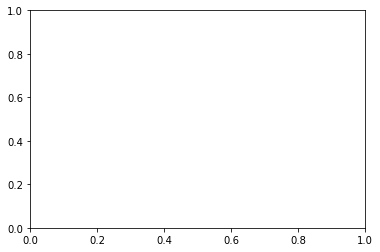

In [55]:
fig, ax = plt.subplots()

ax.plot(a.index, a['worldwide_gross'], label = "reboot", linestyle="-")
ax.plot(b.index, b['worldwide_gross'], label = "non-reboot", linestyle="--")
plt.xticks(ticks= year_list)
plt.savefig("~/Users/Alice/Desktop/xyz.jpeg")
plt.show()